In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
df = pd.read_csv("dementia_dataset (374 records, needs cleaning).csv").dropna().drop_duplicates()
print(df.head(), end="\n\n")
print(df.info())

  Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88    18   
6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90    18   
7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
5  3.0  28.0  0.0  1215  0.710  1.444  
6  3.0  27.0  0.0  1200  0.718  1.462  
7  4.0  28.0  0.0  1689  0.712  1.039  

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  354 non-null    object 
 1   MRI ID      354 non-null    object 
 2   Gro

In [3]:
le = LabelEncoder()
df['Group'] = le.fit_transform(df['Group'])
df1 = df.drop(['Subject ID', 'MRI ID'], axis=1, inplace=False)[df['Group'] != 0]

print(df1.head(), end='\n\n')

for i in ['Group','M/F', 'Hand']:
    print(df1[i].value_counts(), end="\n\n")

print(df1.info())

   Group  Visit  MR Delay M/F Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV  \
0      2      1         0   M    R   87    14  2.0  27.0  0.0  1987  0.696   
1      2      2       457   M    R   88    14  2.0  30.0  0.0  2004  0.681   
5      2      1         0   F    R   88    18  3.0  28.0  0.0  1215  0.710   
6      2      2       538   F    R   90    18  3.0  27.0  0.0  1200  0.718   
7      2      1         0   M    R   80    12  4.0  28.0  0.0  1689  0.712   

     ASF  
0  0.883  
1  0.876  
5  1.444  
6  1.462  
7  1.039  

Group
2    190
1    127
Name: count, dtype: int64

M/F
F    180
M    137
Name: count, dtype: int64

Hand
R    317
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     317 non-null    int32  
 1   Visit     317 non-null    int64  
 2   MR Delay  317 non-null    int64  
 3   M/F       317 non-null 

In [6]:
df1.drop(columns=['Hand'], axis=1, inplace=True)
df1['M/F'] = df1['M/F'].replace({'M': 0, 'F': 1})
print(df1.head(), end='\n\n')
print(df1.info())

   Group  Visit  MR Delay  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      2      1         0    0   87    14  2.0  27.0  0.0  1987  0.696  0.883
1      2      2       457    0   88    14  2.0  30.0  0.0  2004  0.681  0.876
5      2      1         0    1   88    18  3.0  28.0  0.0  1215  0.710  1.444
6      2      2       538    1   90    18  3.0  27.0  0.0  1200  0.718  1.462
7      2      1         0    0   80    12  4.0  28.0  0.0  1689  0.712  1.039

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     317 non-null    int32  
 1   Visit     317 non-null    int64  
 2   MR Delay  317 non-null    int64  
 3   M/F       317 non-null    int64  
 4   Age       317 non-null    int64  
 5   EDUC      317 non-null    int64  
 6   SES       317 non-null    float64
 7   MMSE      317 non-null    float64
 8   CDR       317 non-null    float64
 9

In [11]:
print(df1.corr()['Group'])

Group       1.000000
Visit       0.135657
MR Delay    0.174719
M/F         0.274376
Age         0.053649
EDUC        0.220565
SES        -0.164715
MMSE        0.623282
CDR        -0.857892
eTIV        0.013106
nWBV        0.331292
ASF        -0.004759
Name: Group, dtype: float64


In [13]:
corr = df1.corr()['Group'].sort_values(key=lambda x: abs(x), ascending=False)
print(corr)

Group       1.000000
CDR        -0.857892
MMSE        0.623282
nWBV        0.331292
M/F         0.274376
EDUC        0.220565
MR Delay    0.174719
SES        -0.164715
Visit       0.135657
Age         0.053649
eTIV        0.013106
ASF        -0.004759
Name: Group, dtype: float64


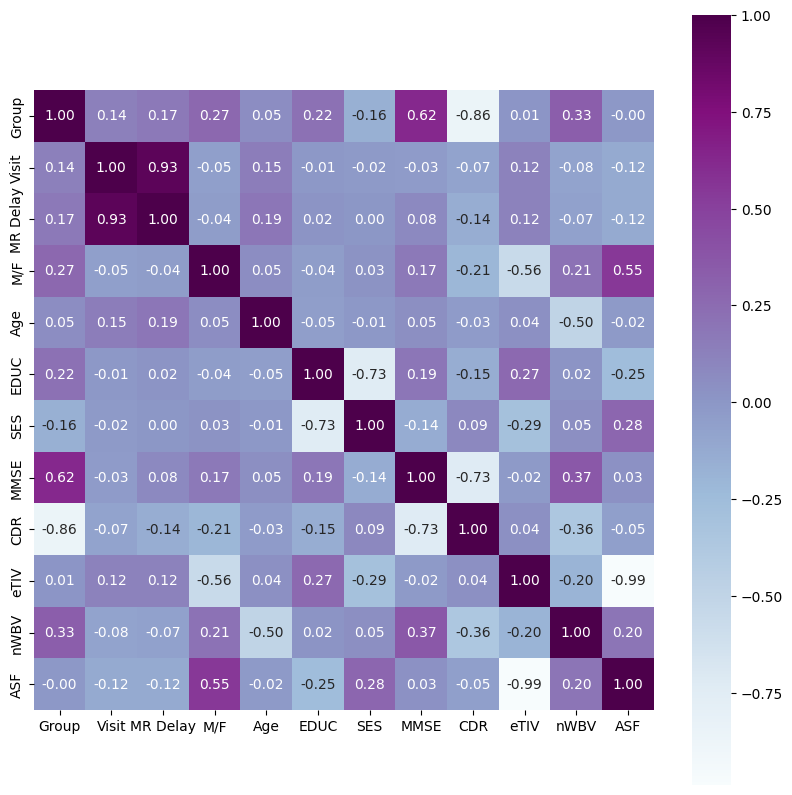

In [8]:
matrix = df1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True, fmt='.2f')
plt.show()


<Axes: xlabel='CDR'>

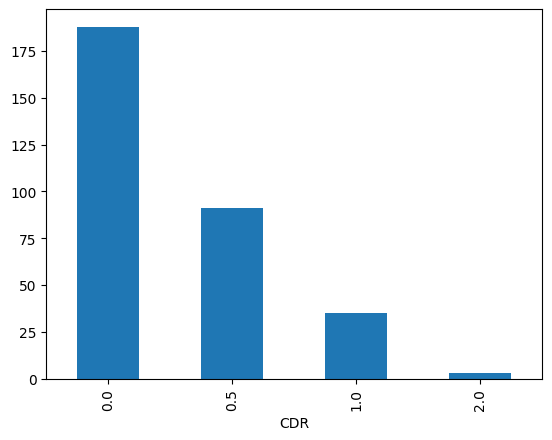

In [14]:
df1['CDR'].value_counts().plot(kind='bar')